# Diffusion Modeling!

There are a few things I want to do:

1. Calculate the diffusion distance $R_D$ for runaway CRs. I think the big thing I need to do this is and an estimate of the surrounding cloud mass. Is tha right?

2. Estimate of the background γ-ray flux so I can determine if I can detect the sources I'm trying to detect. Reading some Gabici papers for this, like (Gabici 2009). Estimate the flux level of CRs as a function of distance to verify its above the CR background. So this is different than just estimating the passive background flux from the sea of CRs. Can I still just use that Aharonian&#x2F; Gabicic eqution? Maybe one of those Casanova papers says how to get the flux? 

3. Other CO things. Setting threshold for W(CO). Determing more appropriate integration range for each SNR


In [1]:
#none of this works work without dev version (3?) of ipython?
%reload_ext ipyBibtex
%etal 3 
%bibFile /Users/jmcohen/Dropbox/CurrentWork/SNR_MC/modeling/diffusionModeling.bib


## 0. Relevant papers

###I found an ipynb extension to allow bitext citation, but I think it only works with ipython-dev right now

Aharnonian & Atoyan 1996: emissivity of π0 near accelertor http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=1996A%26A...309..917A&link_type=ABSTRACT

Baring et al: Radio to Gamma-Ray Emission from Shell-Type Supernova Remnants: Predictions from Nonlinear Shock Acceleration Models
http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=1999ApJ...513..311B&link_type=ABSTRACT


Bolatto, Wolfire, Leroy: The CO-to-H2 Conversion Factor http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=2013ARA%26A..51..207B&link_type=ABSTRACT

Chevalier 1999: Supernova Remnants in Molecular Clouds
http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=1999ApJ...511..798C&link_type=ABSTRACT

Drury, Aharonian, Voelk 1994: γ-ray viisbility of SNRs http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=1994A%26A...287..959D&link_type=ABSTRACT

Dermer 1986: Secondary production of neutral pi-mesons and the diffuse galactic gamma radiation
http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=1986A%26A...157..223D&link_type=ABSTRACT

Dermer & Powale: Gamma Rays from Cosmic Rays in Supernova Remnants
http://arxiv.org/abs/1210.8071v2

Finke & Dermer: Cosmic Ray Electron Evolution in the Supernova Remnant RX J1713.7-3946 (info on leptonic emission scenarios)
http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=2012arXiv1203.4242F&link_type=ABSTRACT

Gabici et al 2009: http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=2009MNRAS.396.1629G&link_type=ABSTRACT

Gaisser, T.~K. 1990, Cambridge and New York, Cambridge University Press, 1990, 292 p.,

Gaisser et al. 1999: Gamma-Ray Production in Supernova Remnants
http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=1998ApJ...492..219G&link_type=ABSTRACT

Ginzburg, V.~L., & Syrovatskii, S.~I. 1964, The Origin of Cosmic Rays, New York: Macmillan, 1964, 

Houck & Allen 2006: MODELS FOR NONTHERMAL PHOTON SPECTRA
http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=2006ApJS..167...26H&link_type=ABSTRACT

Kamae et al: parameterization of π0 for photons and neutrinos http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=2006ApJ...647..692K&link_type=ABSTRACT & erratum

Kelner et al 2006: energy spectra of $\gamma$-rays from p-p interactions
http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=2006PhRvD..74c4018K&link_type=ABSTRACT

Lande et al 2012:
http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=2014arXiv1401.6718L&link_type=ABSTRACT: ,also see Houck & Allen.

Trulelove & McKee 1999: Evolution of Nonradiative Supernova Remnants
http://iopscience.iop.org/0067-0049/120/2/299/

In [108]:
%%cite

This doesnt work right now __\citet{Abdo09-diffGammas}__

This doesnt work right now __\citet{Abdo09-diffGammas}__

## 0. Preliminaries

##Diffusion eq'n for spherically symmetric impulsive source

From http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=1996A%26A...309..917A , http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=1995PhRvD..52.3265A&link_type=ABSTRACT

Particle distribution function, sometimes also called energy distribution function (does it mean the same thing? does energy imply E in $dx^3dp^3$, particle meanes # in  $dx^3dp^3$? 

\begin{equation} \frac{\partial f}{\partial t} = \frac{D}{R^2} \frac{\partial}{\partial R}R^2 \frac{\partial f}{\partial R} + \frac{\partial }{\partial E} (Pf) +Q \end{equation}

with,

* $f \equiv f ( E,R,t )$: Distribution function for particles of energy E, at instance t, a distance R from the source
* $P = -dE/dt$: continuous energy loss rate. Energy losses of protons are due to ionization and and nuclear interaction, $P (E) = P_{ion} + P_{nucl}$. Above 1 GeV, nuclear energy loss domimates. $P_{nucl} = E/\tau_{pp}$, with $\tau_{pp} = (nc\kappa \sigma)^{-1} \approx 6\times 10^7 (n/1cm^{-3}$) yr. Typical ambient density is 1-100$cm^{-3}$, in dense clouds could be 10$^2$ - 10$^4$ cm$^{-3}$, so energy loss scale becomes comparable to lifetime of accelerators as well as CR propagation times
* $Q \equiv Q ( E,R,t )$: source function. Sometimes called energy/momentum distribution function, units (for energy distribution [$cm^{-3} GeV^{-1}$], for momentum distribution [$cm^{-3} GeV^{-1} c$], so I think the is just the phase space density integrated over momentum space? 
* $D \equiv D (E)$: diffusion coefficient (assumed indendent of R,t)
* Standard diffusion approximation neglects convection,
Green functions solution for arbitray accelerated particle injection spectrum $f_{inj} (E), Q ( E,R,t ) = N_{0} f_{inj}\delta {\bf R} \delta t$, and power law injection and Diffusion, $f_{inj} = E^{-\alpha}, D(E) \propto E^{\delta}$, given in (http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=1995PhRvD..52.3265A&link_type=ABSTRACT) and Aharnonian & Atoyan 1996, and Gabici et al. 2009.

Add different versions of f for powelaw E/D

## 2. $\gamma$-ray Flux From Passive Molecular Clouds <sup><sub>(http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=1996A%26A...309..917A&link_type=ABSTRACT </sub></sup>


Higher $\gamma$-ray emissivity near accelerators than on larger scales in the ISM
\begin{equation} \frac{F_{\gamma} =\int_{V_{0}} n({\bf r}) q_{\gamma}({\bf r})d^3r}{4\pi d^2} \end{equation}


Neglecting gradient of CR density in the cloud (i.e. assuming the emissivity, $q_{\gamma}$ is the same throughout the cloud)
\begin{equation} F_{\gamma} = \frac{M_{cl}}{m_p} \frac{q_{\gamma}}{4\pi d^2} \end{equation}
$\gamma$-ray emissivity > 100 MeV determined by LAT in (http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=2009ApJ...703.1249A&link_type=ABSTRACT). Most of what's below is from (http://arxiv.org/abs/1304.1172v1)
\begin{equation} q_{\gamma}^0 (> 100 MeV)/4\pi =  1.6 \times 10^{-4} \left(\frac{N_H}{10^{22} cm^{-2}}\right) ph/s/sr/H atom \end{equation}
I think $q_{\gamma}^0 \approx q_{\gamma}(l)$ if the emissivity is the same throughout the cloud. Integrating the emissivity times gas density along the line of site gives the intensity. Integrating the emissivity times gas density over the volume (divide by distance$^2$) gives the flux. What about particle distribution function to intensity?

For $M_5 = 10^5M_{\odot}$ and distance in kpc:
\begin{equation}F_{\gamma}(>100 MeV) \approx 2\times 10^{-7}\frac{M_{5}}{d_{kpc}^2} ph/cm^{-2}/s \end{equation}
How to get the emissivity > 1 GeV? Look at Abdo paper. Is there another estimate of $q_{\gamma}^0$ somewhere?

So this is all just telling me what the diffuse emission from the cloud would be if there was no accelerator nearby. I can use this to set the intensity threshold for W(CO) for association of MCs with candidate GeV sources if I know the cloud mass.

Next I need to estimate the Flux from a cloud with a nearby accelerator. 


## 3. $\gamma$-ray Flux From Cloud Near Accelerator

$\gamma$-ray's above 100 MeV are produced by particles of energy above about 1 GeV per nucleon

Where to put this

Need to include contribution from $\pi_0$, IC, and bremsstrahlung. See Blumenthal & Gould, appendix B of Drury 1994

Hanabata et al. 2014 "gamma rays above 2GeV are produced by particles above 10 GeV/c"

## 4. Diffusion Distance/Radius

Radius of the sphere up to which particles of energy E effecitvely propogate to during the time, t, after their injection into the ISM (meaning after the time at which they escape the SNR shock), Aharnonian & Atoyan 1996.

Some different ways of writing the diffusion coefficient:

####Aharnonian & Atoyan 1996:
\begin{equation} R_{diff} \equiv R_{diff} (E,t) = 2\sqrt{D(E)t \frac{exp(t\delta/\tau_{pp}-1)}{t\delta/\tau_{pp}}} \end{equation}

$\delta$ is power-law exponent of energy.

for t

####Gabici et al 2009
\begin{equation} R_{d} (E) = \sqrt{4D(E) (t-\chi (E))} \end{equation}
w/ $\chi(E) = t_{sedov}\big (E/E_{max} \big)^{-1/\delta}$

$D(E) = 10^{28} (E/ 10 ~GeV )^s$, he uses s = 0.5

For avg Galacitc value: $D_{ISM}(E) \propto E^{−s}$, with $D_{ISM} ≈ 10^{28} cm^2 s^{−1}$ at E ≈ 10 GeV and s ≈ 0.3–0.7, (Berezinskii V. S., Bulanov S. V., Dogiel V. A., Ginzburg V. L., Ptuskin)

$t_{sedov}$ defined in [$\S 6$](#6.-Sedov-Taylor-SNR-Evolution) 


####Ohira et al 

####Uchiyama et al 2012
\begin{equation}R_d (p,t) \equiv 2\sqrt{D_{ISM}(p)(t-t_{esc}(p))} \end{equation}
w/ $D_{ISM} = 10^{28} D_{28} \big (p/ 10 ~GeV~c^{-1} \big)^{\delta}$, for $D_{28} =1$,

$\delta = 0.6$, Ptuskin, V. S., & Zirakashvili, V. N. 2005, A&A, 429, 755 gives $\delta$: this $\delta$ is s in Gabici 2009.

CRs with a momentum p can escape from the surface of an SNR at time $t = t_{esc}(p)$ when the SNR radius becomes $R_{esc}(p)$

$t_{esc}(p) =t_{ST}(p/p_{max})^{-1/\chi}$ (this $\chi$ is NOT the same as Gabici 2009!!!).
Using t as the current age of the SNR we can get the momentum p of particles currenntly escaping the SNR, what does this matter?

$p_{max} = 10^{15} eV c^{−1}$ and $\chi$ = 3

Sedov solution gives

$R_{esc}(p) = r_{ST}(p/p_{max})^{−2/5\chi}$

$t_{ST}$ defined in [$\S 6$](#6.-Sedov-Taylor-SNR-Evolution) 

###Practically, what do I need to calculate $R_D$ for any SNR?
The diffusion distance is the distance particles of a given momentum, at time t after escape, will have travelled. So there's a continum of diffusion distances for particles of momentum p

If I use t as the current age of the remnant, I can get the momentum, p, of particles currently escaping, which will be the lowest energy particles escaping, but what does this say about  but what I want to know is something like a max diffusion distance? or a max diffusion distance for the particles that give rise to GeV emission? 

I also have to assume something about the diffusion coefficient (galactic or not)
What enery protons give GeV photons?

From the W44 paper, $R_{CR}(p) = R_d (p, t_{age}) + R_{esc}(p)$, is the size of the CR halo expected for escaped CRs. They know that radius of W44 is R =12.5 pc, and say that $R_{CR}(100 GeV c^{−1}) \simeq 2R$. I think the 2R is just from looking at the  actual size of the GeV halo, and then saying  $2R = R_d (p, t_{age}) + R_{esc}(p)$, and then do they just assume that $p = 100~GeV~c^{−1}$. Maybe I can solve for p for an assumed $t_{age}$ and $D_{28}$?.

If the latter is true, then I can find p for given age and distance to candidate source, the question then becomes can particles of that p give $\gamma$'s at GeV energy? Sure! Can I use sympy to solve for p?
##$R_D$ can only tell me the distance that protons with momentum p are at, by time t. If I know the separation between a candidate source and SNR edge, I can 



In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML
import numpy as np
import pandas as pd
#from scipy import integrate
from astropy import units as u
import astropy.io.fits as pyfits
from astropy import constants as const
from matplotlib import pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
from sympy import init_printing
from sympy import Symbol, Eq
from ipywidgets import StaticInteract, RangeWidget
import sys
import os
from lande.utilities.tools import tolist #for saving yaml
#for playing with diffuse cube
import aplpy
# import yt
# from yt.frontends.fits.misc import PlotWindowWCS
# from wcsaxes import datasets, WCS
# from spectral_cube import SpectralCube
# from pvextractor.gui import PVSlicer
# from pvextractor import extract_pv_slice
# from pvextractor.geometry import Path
# from yt.frontends.stream.api import load_uniform_grid
import pyJam.fermi.SNR_MC.coCube as cocube
#from yt.imods import OffAxisProjectionPlot
#from astropy.io import fits #this is deprecated
#import plotly

In [2]:
###I should pull all of the plotting stuff out of this function and use a decorator (is that what they're used for?), or separate plottoing function 
def diffCoef(p=100.,D28=1,tage=1e4,tst=129,delta=0.6,pmax=1.e6,chi = 3., vs = 'D28'):
    """Diffusion coefficient as function of p
       D28: diffusion coefficient. D28 = 1 is Galactic value [cm^2 s^-1]
       tage: age of remnant [yr], enter in years convert to seconds
       tst: time of onset of sedov evolution, enter in years convert to seconds
       delta: diff coeff scale as power law, delta, in momentum
       pmax: maximim momentum [GeV c^-1], defualt is 1e15 eV c^-1 = 1e6 GeV c^-1
       chi: momentum power law index for escape time
    """
    %matplotlib inline
    if vs == 'p':
        p = np.linspace(1.,100.,100) #[eV c^-1]
        factor = 1.e9
        xscale = 'linear'
        xlab = 'p [GeV $c^{-1}$]'
        ttl = 'Diffusion Distance: $D_{28}$=%(D28)s $cm^2 s^{-1}$, $t_{age}$=%(tage).2e yr' %locals()
    elif vs == 'D28':
        D28 = np.linspace(0.01,3.,100)
        factor = 1
        xscale = 'linear'
        xlab = '$D_{28}$ [$cm^2 s^{-1}$]'
        ttl = 'Diffusion Distance: p=%(p)s $GeV~c^{-1]$, $t_{age}$=%(tage)s yr' %locals()
    elif vs == 'tage':
        tesc = tst*(p/pmax)**(-1./chi)
        tage = np.linspace(tesc,5.e4,100)
        factor = 1
        xscale = 'log'
        xlab = '$t_{age} [yr]$'
        ttl = 'Diffusion Distance: $D_{28}$=%(D28)s $cm^2 s^{-1}$, p=%(p)s $GeV~c^{-1]$' %locals()
    #p = p*u.eV*1e9/const.c.cgs #[eV c^-1], from GeV to eV
    p = p*u.eV*1e9 #[eV c^-1], from GeV to eV
    D28 = D28*u.cm**2/ u.s
    #Dism = 1.e28*D28*(p/(1e10*u.eV/const.c.cgs))**delta #[cm^2 s^-1], p in eV c^-1
    Dism = 1.e28*D28*(p/(1e10*u.eV))**delta #[cm^2 s^-1], p in eV c^-1
    tage = tage*u.yr #kept this just for putting in the title of the plot
    tageSec = tage.to(u.s)#[s], yr to s
    #pmax = pmax*u.eV*1e9/const.c.cgs
    pmax = pmax*u.eV*1e9 #[eV c^-1]
    tst = tst*u.yr
    tst = tst.to(u.s)
    tesc = tst*(p/pmax)**(-1./chi) #convery tst to sec
    Rd = 2.*np.sqrt(Dism*(tageSec-tesc)) 
    Rd = Rd.to(u.pc)
#     print 'p',p,'\n'
#     print 'D28',D28,'\n'
#     print 'Dism',Dism,'\n'
#     print 'tage',tage,'\n'
#     print 'pmax',pmax,'\n'
#     print 'tesc',tesc,'\n'
#     print 'Rd',Rd,'\n'
    #matplotlib currently has issues just plotting astropy quantity arrays, convert to plain np arrays
    #plt.plot(np.asarray(p*const.c.cgs/1.e9),np.asarray(Rd))
    #plt.plot(np.asarray(p/1.e9),np.asarray(Rd))
    #layout = {"yaxis":{"title": "Rd [pc]"},"xaxis":{"title":xlab}} # optional
    #x = np.asarray(vars()[vs])/factor
    #y = np.asarray(Rd)         
    #ply.iplot([{'x':x , 'y':y }],layout=layout)
    plt.plot(np.asarray(vars()[vs]/factor),np.asarray(Rd))
    plt.xscale(xscale)
    plt.xlabel(xlab)
    plt.ylabel('Rd [pc]')
    plt.title(ttl)
    return Rd
###add something to calculate tst

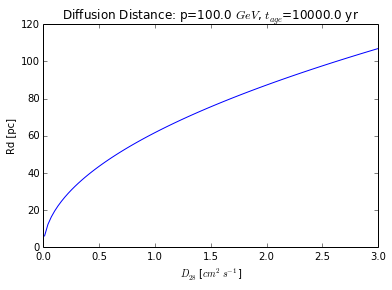

In [3]:
#rd = diffCoef(p=100.,D28 = 0.1, tage = 2.e4,tst = 129.,delta = 0.6)
#print rd
w = interactive(diffCoef,p = (1.,100.), D28=(0.01,3), tage=(0.0,5e4), tst=(0.0,1000.))
display(w)

In [34]:
a = w.result #this is Rd for whatever values the slider is set to 
w.kwargs
a[-1]

<Quantity 157.86941832928898 pc>

## 5. Hadronic Photon Emissivity/Intensity/Luminosity/Flux (also proton emissivity mixed in)

Emissivity of $\pi_0$ decay photons created via p-p interactions: $\gamma$-ray emissivity is the # of photons produced per H atom. 

**Dermer 86**: Integrated (over energy) galactic $\gamma$-ray emissivity due to secondary $\pi_0$: $q_\gamma (\geq 100 MeV) = 1.53\times 10^{-25} (s-H~ atom)^{-1} $ # of photons /sec/H-atom (meaning per collision, or does is it double for collision with two H atoms?), in the paper it says this is in the ISM, away from sources. This is # is from fits to the locally observed CR proton spectrum

**Drury 94**: 

$\gamma$-ray production rate per volume
\begin{equation} Q_\gamma = \mathcal{E}_{\gamma} n = q_{\gamma}nE_c~[(s-H~ atom)^{-1} cm^{-3}] \end{equation}n is # density of gas [$cm^{-3}]$, $E_c$ is CR energy density $[erg/cm^3]$, $q_{\gamma} = \mathcal{E}_{\gamma}/E_c$ is the $\gamma$-ray emissivity normalized to the CR energy density. 

**Drury** says $\mathcal{E}_{\gamma} (\geq 100 MeV) \approx (1-1.5)\times 10^{-25} (s-H~ atom)^{-1}$, so **Drury's** $\mathcal{E}_{\gamma}$ is  **Dermer's** $q_{\gamma}$, **Drury's** $q_{\gamma}$ is emissivity normalized by energy density, with $E_c \approx 10^{-12} erg/cm^3$, and  $q_{\gamma} (\geq 100 MeV) \approx 10^{-13} [cm^3/erg/sec/H-atom]$

$\mathcal{E}_{\gamma}(E) = \frac{2}{(\alpha + 1)} \langle mx \rangle ^{\alpha}_{\pi_0} \sigma_{pp}cN_{p}(E)$, with $N_p(E) = N_0E^{-\alpha +1}$, and $\langle mx \rangle ^{\alpha}_{\pi_0} = \int_{0}^{1}x^{\alpha}g(x)dx$ is the spectrum weighted moment of the inclusive cross secion (table A1 in Drury). **I have no clue how this Q turns out to be the same as the first equation above** ok, some clue: $dN/dp = A(p/p_0)^{-\alpha}$, $d\sigma/dE$ must be $\sigma_{pp}$ plus the other factors I don't get, but they're just #'s
**See http://arxiv.org/pdf/1506.00047v1.pdf for the LAT derived emissivity. Idk if they give the integrated, but they do give the differential/sr**
Total $\gamma$-ray luminosity: $L_{\gamma} = \int q_{\gamma} n E_c d^3r$ in [ph/s]  = $q_{\gamma} (M_1+M_2)\frac{3\theta E_{SN}}{4\pi R^3}$ (this doesn't make sense to me, $\rho$ missing? $\rho$ for protons?) $\approx \theta q_{\gamma} E_{SN}n$.

$L_{\gamma} =10^{38}\theta (E_{SN}/10^{51} erg)(n/cm^{-3}) ph/s$

So flux at Earth is (using the value of $q_{\gamma}$ above,

\begin{equation} F_{\gamma}(\geq 100 MeV) \approx 4.4 \times 10^{-7} \theta (E_{SN}/10^{51} erg)(n/1 cm^{-3})(d/ 1kpc)^{-2} ~ph/cm^2/s \end{equation}

n is the pre-shock, ambient density. In Slane 2007, they plot $F_{\gamma}$ vs age for different densities using $\theta$ which is a slow function of age, but they don't give $\theta$. I'm not sure how they get this as a function of age, or what they use for theta. Slane also says it's the expected pion decay flux from an SNR. **IS it the same for an SNR and for passive cloud? Yes because it depends on density, no because it's a function of $E_{SN}$, which maybe doesn't apply for escape?** Markiewicz et al 1990 has more on $\theta$ and injection models (likeltsomething newer newer around too). In Drury 1994, they have plots of L and surface  brightness vs age, do they use $\theta$ or  say the density is #/vol ~ 1/$R^3$, and then use ST evolution to go from R --> age? Seems not ok to do this if n is the pre-shock/ambient( i.e. outside the shock, not yet shocked/ upstream in shock frame) density no? I think it's that the energy density on either side of the shock is the same (they give reasons why, which I stated above), so energy denisty is E/vol, then go from vol to age I guess. I still think there's a $\rho$ missing in the equation that involve mass.


Both apply during free expansion and ST phase, w/ \theta << 1 for free expansion (the shock is what transfers energy kintetic energy from the SN explosion to the particles by accelerating them, during free expansion, almost all the energy is in the form of KE of the ejecta. \theta parameterizes the lack of understanding of exactly how injection occurs. \theta is nearly constant througout the ST phase. Similar to $q{\gamma}$, $L_{\gamma}$ has and energy dependent form VHE photons.
 

I was going to write the emissivity here $\mathcal{E}_{\gamma} (E_{SN}/10^{51} erg)(n/1cm^{-3}$

$q_{\gamma} (\geq 100 MeV) \approx 0.5 \times 10^{-13} [cm^3/erg/sec/H-atom]$, this neglects cooling but **Drury** claims it's ok since the CR energy density is uniformly distirubuted inside the remnant (because of efficient diffusion), and that gas clumping due to cooling is not likely to significantly change the results. This form also and doesn't not apply to energies $E >> 100~MeV$

**Aharonian  & Atoyan 1996**:
green funciton solution to diffusion equation for power law source injection spectrum
\begin{equation} f(E,R,t) \approx \frac{N_0 E^{-\alpha}}{\pi^{3/2}R_{diff}^{3}} exp \bigg (-\frac{(\alpha-1)t}{\tau_{pp}}- \frac{R^2}{R_{diff}^2} \bigg ) \end{equation}

Are the units of f #/vol, or #/vol/energy? If $J = (c/4\pi)f$, and J is differential (per energy) then f must be too right (unless this version of J is a simplified one? I don't understand where the $W_p$ or $L_p$ comes from in eq'n 6, 10. If eq'6 is $W_p$, I understand why eq'n 10 would be $L_p$, since we integrate Q(t)dt to get the erf. Does it mean that $N_0$ has units of energy for eq'n 6? OH! is it that the protons spectrum is $dN/dE \propto E^{-\alpha}$, and maybe what they call Q is this per vol, so the Total momentum spectrum just integrates over the volume. So the $N_0$ is #/GeV.

Where the part with $\tau$ drops out for $t << \tau_{pp}$.

Letting $\zeta = R/R_{diff}$, we can rewrite this as,
\begin{equation} f(E,R,t) \approx \frac{g(\zeta) N_0 E^{-\alpha}}{\pi^{3/2}R^{3}} \end{equation}

with $g(\zeta) = \zeta ^3 e^{ \zeta^2}$. Can consider maximum flux of particles since g is max when $\zeta = \sqrt 1.5$. g is the factor the modifies the input spectrum



If f is the phase space density, then I'd think the units of are #$/cm^{-3}/(cm/s)^{-3}$, but maybe that's not right?

###I'm confused about whether we use the continuous or impulsive (sometimes called burstlike) versions of the particle distribution function. Initially I thought continuous, what's written right below this makes me think impulsive? But then it looks like everyone uses the continuous equation. So continuous it is?
Particle acceleration occurs during the ST phase and is considered a "continuous" accelerator (which sounds counterintuitive to me at first, they consider briefly pulsars as an accelerator, which at first thought is a continuous source (pulsar can pump energy in, as opposed to the SNR blast), but the shock accelerating particles over long time scales (wrt to the age of the accelerator) is why the SNR is considered a "continuous" accelerator, whereas for a pulsar, the bulk of CRs are thought to occur at. I'm confused about when this applies :(

###Differential flux of protons (NOT PHOTONS!):
$J(E,R,t) = (c/4\pi)f$, unit:$[cm^{-2} s^{-1}sr^{-1}GeV^{-1}]$. So then f has units $[cm^{-3} sr^{-1} GeV^{-1}]$, and is the differential particle distribution function?

Single source, constant acceleration rate: $Q(E,t) = Q_0E^{-\alpha} q(t)$, with q(t < 0) = 0 & $q(t\geq 0)$ = const.


For a power-law proton spectrum: $J_p = KE^{-\alpha}$, where E is the total energy of the proton. The differential $\gamma$-ray emissivity is (this assumes that the spectrum of nuclei is the same as that of the protons, which is not necessarily true).

\begin{equation} q(E_{\gamma}) = 4\pi \sigma_{pp} \frac{2Z^{(\alpha)}_{p\rightarrow \pi^{0}}}{\alpha} \times J_p(E_{\gamma})\eta_A\end{equation}

Where $\eta_A$ is  factor that takes into account the contribution of nuclei and is $\sim$ 1.4-1.5, and corresponds to the fraction of kinetic energy,$E_{Kin} = E - m_pc^2$, of the parent population transferred to secondary $\pi_0$, $f_\pi \approx 0.17$. I think $\eta$ =1 for protons.

Z is the spectrum weighted moments (I think I mention this below as well).

For a delta function approximation of the differential cross section of $\pi_0$ produciton and a value for Z, the (differential?) $\gamma$-ray emissivity for an arbitrary spectrum of primary protons is,
\begin{equation} q_{\gamma}(E_{\gamma}) = 2 \int_{E_{min}}^{\infty} \frac{q_{\pi}(E_{\pi})}{\sqrt{E_{\pi}^{2}-m^2_{\pi}c^4}}dE_{\pi}\end{equation}

where

\begin{equation} q_{\pi}(E_{\pi}) = \int \delta (E_{\pi} - f_{\pi}E_{Kin}) \sigma_{pp}J_p(E) dE = \frac{1}{f_{\pi}} \sigma \Big ( m_pc^2+\frac{E_{\pi}}{f_{\pi}} \Big ) J_p  \Big ( m_pc^2+\frac{E_{\pi}}{f_{\pi}} \Big )\end{equation} 

and $E_{min} = E_{\gamma} +m^2_{\pi}c^4/4E_{\gamma}$
these parantheses aren't times, that's the energy to evauate $\sigma$ and J at.

###Look at the LAT emissivity paper to see if they talk about going from #\gamma# flux to emissivity
$\gamma$-ray fluxes combined with measurements of the hydrogen column density allow measurement of $\gamma$-ray emissivity. Estimated emissivity is in agreement with expected emissivity calculated for locally measured CR flux so the localy measured CR flux is a good indicator of the average level of the "sea" of Galactic CRs

###Lande et al. 12, also see Houck & Allen 06.

$\gamma$-ray emission from neutral pion decay:
\begin{equation} \frac{dN}{dtdE} = n_H \int dE\nu_p N_p(E)\frac{d\sigma_{pp}}{dE}\end{equation}

$N_p(E)$ is the differential proton distribution (#/E? #/vol/E?), $\frac{d\sigma_{pp}}{dE}$ is the $\gamma$-ray cross section from proton-proton interactions. 

Not sure where this came from (Longair 1992 book?)

**Gaisser et all 1998:**

Gaisser's definitions seems different from what's above :(
By distribution function, I think I mean the phase space density, units of #$ /cm^3/(momentumVolume)^3$, if differential, then divide by energy. Then then the particle distribution function, or momentum/energy distribution (This is Q I think typicall?) the phase space density integrated over $p^2 dp$,units of #$/cm^3$, if differential, divide by energy. And then the total particle spectrum is obtained by integrating the momentum/energy distribution over the volume of the source, units of #, or #/energy.

Sometimes momentum spectrum means #/energy, sometimes #/vol/energy

**Baring et al 1999:**
General emissivity for electrons/protons
For a shock-accelerated distribution of electrons or ions, $(dJ/dE)_{e,i}$ the number density per unit kinetic energy is $(4\pi/ \nu_{e,i})(dJ/dE)_{e,i}$ and the number of photons emitted per unit volume per second in therange $\epsilon_{\gamma}$ to $\epsilon_{\gamma}+d\epsilon_{\gamma}$ (where $\epsilon$ is the $\gamma$-ray energy in units of $m_ec^2$), takes the form:

\begin{equation}\frac{dn_{\gamma}(\epsilon_{\gamma})}{dt} = \int _0^\infty \frac{dn_{\gamma}(E_{e,i},\epsilon_{\gamma})}{dt} \bigg [\bigg (\frac{4\pi}{\nu_{e,i}}\bigg ) \bigg(\frac{dJ}{dE} \bigg )_{e,i}  \bigg ] dE_{e,i}\end{equation}

where $dn_{\gamma}(\epsilon_{\gamma})/dt$ is the emissivity of a single particle, either an electron or an ion, of kinetic energy $E_{e,i}. 

If a source is at a distance $d_{SNR}$ , with an emission volume $V_{SNR}$ , the number of photons per unit area per second per unit photon energy arriving at Earth is $F_{\gamma} = [dn_{\gamma}(\epsilon_{\gamma})/dt] V_{SNR}/(4\pi d^2)$

$\epsilon_{\gamma}$ is a photon energy, $E_{e,i}$ is an electron or proton energy

what is $\nu$?, fequency?

**Shu book**:
Intensity has units [$erg/cm^2/s/sr$] (per Hz for specific intensity

Photon distribution function: $F({\bf x,p},t)dx^3dp^3$, # of photons at time t, in $dx^3$, centered on x, and $dp^3$ centered on p(ignoring spin). The energy incontained in this volume of phase space is, $dE = h\nu F({\bf x,p},t)dx^3dp^3$ (again, ingoring spin stare would have to sum over them). 

*Angular moments of Intensity (specifc)*: $cE_{\nu} = \oint I_{\nu} d\Omega$, $J_{\nu} = cE_{\nu}/4\pi$, or $J_{\nu} = I_{\nu}$, for an isotropic source? $E_{\nu}$ is the monochromatic energy density, unit[$erg/cm^3/Hz$]

from aharonian 1996, if $J= (c/4\pi)f$, then ahar's J (for protons, # not energy) is similar to shu's $E_{\nu}$?, except $E_{\nu}$ is energy instead of # (mult # by $h\nu$ to  get energy). 




###From Micaela's talk, where exactly does this come from?)
\begin{equation} Q_{\gamma}(E_{\gamma}) = \frac{4\pi}{\beta c} n_H \int \frac{dN}{dp}\frac{d\sigma (E_{\gamma})}{dE_{\gamma}}dp,\end{equation}
With dN/dp the proton injection spectrum, and d$\sigma$/dE is the $\pi_0$ cross section to scattering (see Kamae et al.)

This Q is the same as in Drury above.

Photon Flux from emissivity:
\begin{equation} F_{\gamma} (E_{\gamma}) = \frac{Q_{\gamma}(E_{\gamma})V}{4\pi d^2} \end{equation}

Emissivity:  q the emissivity, and $Q_\gamma$ the production rate of $\gamma$'s per volume, emissivity per volume(sometimes)


**Distribution function to flux/emissivity/intensity**

# 6. Sedov-Taylor SNR Evolution
## some paper I was looking at talked about exact vs not solutions
## which are these?
## which paper was that?

### Free Expansion Phase (after explision, prior to ST)
http://astro.berkeley.edu/~ay216/05/NOTES/Lecture11.pdf,  From that ISM book, look at my ISM notes! equations below are same as Slane et al 2010. Truelove & McKee 1999


ST phase starts when swept up mass = ejecta mass, $R \propto t$
\begin{equation}M_{su} = 4\pi /3 R^3 \rho = 0.145n_0R^3_{pc} M_{\odot}\end{equation}
\begin{equation} R_{ST_0} = (3M_{ej}/4\pi \rho)^{1/3} = 1.9(M_{ej}/n_0)^{1/3} pc \end{equation}

### ST Phase
* Strong shock: Mach # M >> 1
* Non-radiative: The total energy in the bubble of hot gas equal to the energy  injected by the supernova (neglect radiative losses)
Radius of the expanding shell
\begin{equation} R_{ST} = 0.26 (n_H/cm^{-3})^{-1/5}(t_{ST}/yr)^{2/5} (E_{ST}/4\times 10^{50} erg)^{1/5} pc? = 0.314(E_{51}/n_0)^{1/5}t_{y}^{2/5} pc\end{equation}
In terms of t (missing a factor in front)
\begin{equation}t_y = (n_0/E_{51})^2(R_{ST}/n_0)^{5/2}\end{equation}
Velocity of expanding shell
\begin{equation}v_s = 1.23\times 10^5(E_{51}/n_0)^{1/5}t_{y}^{2/5} km s^{-1}\end{equation}
Temperature of expanding shell
\begin{equation}T_s = 2.09\times 10^{11} = (E^{51}/n_0)^{2/5}t^{-6/5} K\end{equation}


### Radiative (snow plough) Phase
The Sedov-Taylor phase terminates when radiative losses behind the outward moving blast wave start to become important, i.e. cooling timescale of the shocked plasma at the blast wave is shorter than the dynamical expansion time

# 7. Estimating Cloud Mass from CO line emission

So far, most info from http://adsabs.harvard.edu/cgi-bin/nph-data_query?bibcode=2013ARA%26A..51..207B&link_type=ABSTRACT
See also:
http://arxiv.org/pdf/1011.2019v2.pdf
http://www.aanda.org/articles/aa/pdf/2004/40/aa1327.pdf
W28_diffusion_MC.pdf
H2 is most abundant molecule. It's diatomic with the same nuclei so has no dipole moment, and thus no dipolar rotational transitions. Hard to exicite vibrationally, quadrapole transitions are weak and require T >~ 100K . So H2 is mostly invisible in the ISM.

He is monatomic, so suffers the same issues as H2. O and C are the next most abundant, which combine to CO under conditions present in MCs. Has weak permanent dipole moment, and lower energy rotational excitation energy (easily exicted in MCs). For  J=(1-0) transition, $\lambda$ = 2.6mm, $\nu$ = 115 GHz. Lies in transparent atmospheric window.

Use CO to measure molecular gas masses!

Simple relationship between CO line intensity and column density:

\begin{equation}N(H_2)=X_{CO}W(^{12}C^{16}O ~J=1-0) \end{equation}
where:
* $N(H_2$): column density [cm$^{-2}$]
* $W(CO)$: integrated line intensity [ K km/s]
* $X_{CO} = 2\times 10^{20} \mathrm{cm^{−2} (K~km~s^{-1})^{−1}}\pm 0.6$ for  inner disk ($1kpc \lesssim R \lesssim 9 kpc$), $0.5\times 10^{20} \mathrm{cm^{−2} (K~km~s^{-1})^{−1}} \pm $ factor of 2 for $R \lesssim 500 pc$
 * Is this R distance from Gal center?
 * for outer milkyway, Bolatto et al. 2013 doesn't give a value for $X_{CO}$, just say it will be higher, but they do mention some other papers that measure it.
 * Other caveats:
   * "It is important to recognize that these are average numbers, strictly valid for GMCs on scales of tens of parsecs. The validity of invoking anything like a constant XCO on a line-of-sight by line-of- sight basis is considerably less defined. Both theoretically and observationally, we have shown that considerable variation can exist on small scales, reflecting local chemistry and physical conditions."

Am I overthinking things? If I have W(CO), and some value for $X_{CO}$, I get column density, which is #of molecules ($H_2$?) per area, so if I scale out the distance^2 and multiply by mass of $H_2$ (not CO right?), and factor in soild angle too (4$\pi$, don't need this right?) I get mass?

W28_diffusion_MC says
\begin{equation}M_{CO}=\mu m_H D^2 X_{CO}\sum_{px}\Omega_{px}W_{CO}\end{equation}

* $\mu$: Is this mean molecular weight? Like if I assume that the cloud is only some percent H I need this?

* $m_H$: hydrogen mass (H$^2$ and not just H right?)

* D: distance

* $\Omega$: Solid angle. If I know deg/pix and # of pix, it will give me the area subtended by the object (when summing over pixels). 

http://www.aanda.org/articles/aa/pdf/2004/40/aa1327.pdf
\begin{equation}W_{CO} = \int T_B dv\end{equation}
* $T_B$: Brightness temp
* $dv$: integrated over velocity

\begin{equation}M({M_{\odot}})=5.65 \times 10^{-21}XW_{CO}\theta_{arcmin}^2 D_{kpc}^2 \end{equation}
* $\theta$ is angular radius in arcmin

Alsoi see http://arxiv.org/pdf/1410.7639v1.pdf equation 3. Similar result (first part at least)

In [18]:
X = 2.7e20/u.cm**2/ (u.K* u.km/u.s)
print X
# d = 22.4*u.kpc
# WCO = 50.9*u.K*u.km/u.s
# WCO.to(u.kpc*u.K/u.s )
# theta = 0.58*u.arcmin/2.
# M = 5.65e-21*X*WCO*theta**2*(d**2)
# print format(M,'g')



2.7e+20 s / (cm2 K km)



** Dame et al. 2001 notes:**

GMC: M = 1e4-1e6 Msol, size= 50-200pc

37 individual surveys take from 

Resolution of COGAL_deep_mom_vlsr: 0.125deg x 0.125deg x 1.3 km/s (l:-180 -- +180, b:-5 -- +5 ,v: -319.8 -- +308.1 km/s
SO WHEN I'M DOING THINGS, DO I NEED TO SMOOTH THIS MAP TO 0.2-0.3 deg? 1deg if E >1gev?

# 7a. tried this to clip CO map

I think this is not right because maybe I need to take the mean/std in some subsection of the map where there are no sources, peaks?

In [1]:
# import pyfits
# ls
# ls *.fits
# import astropy.io.fits as pyfits
# data = pyfits.getdata('SNR189.1+03.0_COGAL_deep_mom_vlsr_lb.fits')
# data
# data.mean
# data.mean()
# data.std
# data.std()
# data.max()
# data.min()
# dataMasked = np.where(data > 3*data.std())
# import numpy as np
# dataMasked = np.where(data > 3*data.std())
# dataMasked = data[np.where(data > 3*data.std())]
# data
# dataMasked
# data[data < data.std()] = 0
# data
# type(data)
# data = pyfits.getdata('SNR189.1+03.0_COGAL_deep_mom_vlsr_lb.fits')
# type(data)
# data = pyfits.open('SNR189.1+03.0_COGAL_deep_mom_vlsr_lb.fits')
# f = pyfits.open('SNR189.1+03.0_COGAL_deep_mom_vlsr_lb.fits')
# g
# f
# type(f)
# data = f.data
# f
# f[0]
# f[1]
# a = f[0]
# a.data
# type(a)
# d
# a = f[1]
# a
# a[a < a.std()] = 0
# a
# a.data[a.data < a.data.std()] = 0
# a.writeto('/Users/jmcohen/Desktop/testClip.fits')
# pwd
# a.data.std()
# a = f[1]
# a = f[0]
# a
# a.data
# f = pyfits.open('SNR189.1+03.0_COGAL_deep_mom_vlsr_lb.fits')
# a = f[0]
# a.data
# a.data[a.data < 3*a.data.std()] = 0
# a.writeto('/Users/jmcohen/Desktop/test3sigClip.fits')
# figure(1)

# 8. Playing with Galactic diffuse file

* See what the emission looks like overall (averaged over energies), at energy slices (specifically > 50 GeV)
 * do this with yt HAVING TROUBLE GETTING YT TO PLOT THE DIFFUSE CUBE BECAUSE THERE'S NO NAME FOR THE Z AXIS. I think the CO cubes I have have BUNIT as K, so YT knows it's temperature
 


In [29]:
#fitsFile = '/Users/jmcohen/Desktop/template_4years_P8_V2_scaled.fits'
fitsFile = '/Users/jmcohen/Desktop/template_4years_P8_V2_scaled_velo.fits'

In [33]:
ds = yt.load(fitsFile, nan_mask=0.0) # z_axis_decomp=True) not sure what that does

yt : [WARNING  ] 2015-04-02 10:39:11,732 Cannot find time
yt : [INFO     ] 2015-04-02 10:39:11,828 Detected these axes: GLON-CAR GLAT-CAR VELO-LSR 
yt : [WARNING  ] 2015-04-02 10:39:12,133 No length conversion provided. Assuming 1 = 1 cm.
yt : [INFO     ] 2015-04-02 10:39:12,237 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-04-02 10:39:12,238 Parameters: domain_dimensions         = [2880 1441   30]
yt : [INFO     ] 2015-04-02 10:39:12,346 Parameters: domain_left_edge          = [ 0.5  0.5  0.5]
yt : [INFO     ] 2015-04-02 10:39:12,347 Parameters: domain_right_edge         = [ 2880.5  1441.5    30.5]
yt : [INFO     ] 2015-04-02 10:39:12,349 Parameters: cosmological_simulation   = 0.0


In [38]:
# dd = ds.all_data() # A region containing the entire dataset
# extrema = dd.quantities.extrema("image_0") #for when I use the default gal dif file
extrema = dd.quantities.extrema("intensity") #for I hacked the gal dif file and change the keyword from energy to VELO-LSR
print extrema
#ds.h.field_list # gives the names of fields(fits,image_0) 

(4.81129967251e-17 K, 9.52388177211e-08 K)


yt : [INFO     ] 2015-04-02 10:45:27,075 xlim = 0.500000 2880.500000
yt : [INFO     ] 2015-04-02 10:45:27,075 ylim = 0.500000 1441.500000
yt : [INFO     ] 2015-04-02 10:45:27,076 Making a fixed resolution buffer of (('fits', 'intensity')) 800 by 800
yt : [INFO     ] 2015-04-02 10:45:28,481 xlim = 0.500000 2880.500000
yt : [INFO     ] 2015-04-02 10:45:28,482 ylim = 0.500000 1441.500000
yt : [INFO     ] 2015-04-02 10:45:28,484 Making a fixed resolution buffer of (('fits', 'intensity')) 800 by 800
yt : [INFO     ] 2015-04-02 10:45:28,649 Making a fixed resolution buffer of (('fits', 'intensity')) 800 by 800



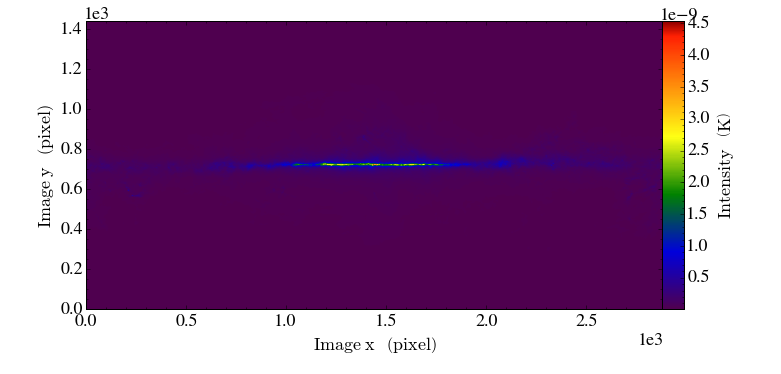

In [39]:
slc = yt.SlicePlot(ds, "z", ["intensity"],origin = 'native') #This works for hacked galDiff, but gives K on the colorbar, change manually?
slc.show()
#this is still only useful if I can use the SpectralCube, and I don't know if that finds the right filed

In [40]:
#Try using the SpectralCube package instead of yt
#I think it fails for the same reason as yt
#CAN I ADD IN A DSS KEYWORD TO GIVE THE HEADER UNITS?
cube = SpectralCube.read(fitsFile,hdu = 'Primary')
cube.shape


(30, 1441, 2880)

INFO:astropy:Auto-setting vmin to -4.809e-15
INFO:astropy:Auto-setting vmax to  5.449e-14


INFO: Auto-setting vmin to -4.809e-15 [aplpy.core]
INFO: Auto-setting vmax to  5.449e-14 [aplpy.core]


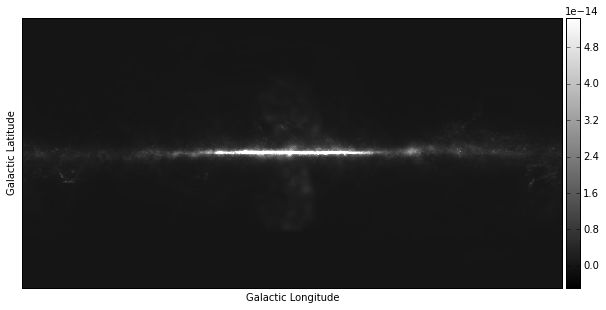

In [41]:
cube[28,:,:].quicklook() 

In [45]:
#this doesn't work for default gal dif
#works for hacked version, but doesn't give the right slab, I think it's be cause the scale is logscale
slab = cube.spectral_slab(5000. * u.km/u.s, 50000 * u.km/u.s)
m1 = slab.moment(order=0) #moment doesn't work for some reason, no spectral axis, it doesn't know how to handle energy
#I can cheat and call energy something else to get it to make slabs, but, why not just do this with my code? I think it does things right, except near edges?
#print m1
m1.write('/Users/jmcohen/Desktop/galDiff_50GeV_500GeV.fits')
#cube.to_pvextractor() #this either, but maybe it's because moment doesn't, know it doesn't seem to work even when moment does

In [54]:
# #try pvextractor since SpectralCube doesn't work
# pv = PVSlicer(fitsFile)
# pv.show() #this doesn't work either

In [51]:
#try yt one more time in a different way
cube = pyfits.getdata(fitsFile)
data = dict(Density = cube)
pf = load_uniform_grid(data, cube.shape)

yt : [INFO     ] 2015-04-02 11:16:00,718 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-04-02 11:16:00,719 Parameters: domain_dimensions         = [  30 1441 2880]
yt : [INFO     ] 2015-04-02 11:16:00,742 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-04-02 11:16:00,743 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2015-04-02 11:16:00,744 Parameters: cosmological_simulation   = 0.0


In [53]:
from yt.mods import OffAxisProjectionPlot
#this kind of works, but can't I just do this in aplpy?
#it has pixel units instead of wcs, I said density, so it used that word
#takes a lot of mem to do
# The vector normal to the slicing plane
L = [29, 0, 0]

# The command to generate the off axis projection plot
p = OffAxisProjectionPlot(pf, L, 'Density')

# Applying a grey colormap to all data
p.set_cmap(field='all', cmap='Greys')

# Saving the image


SyntaxError: invalid syntax (<ipython-input-53-7c735380dd91>, line 6)

In [4]:
#one last time following http://spectral-cube.readthedocs.org/en/latest/yt_example.html
from yt.mods import ColorTransferFunction, write_bitmap
cube = SpectralCube.read(fitsFile, format='fits')

# Extract the yt object from the SpectralCube instance
ytcube = cube.to_yt(spectral_factor=0.75)
ds = ytcube.dataset

# Set the number of levels, the minimum and maximum level and the width
# of the isocontours
n_v = 10
vmin = 0.05
vmax = 4.0
dv = 0.02

# Set up color transfer function
transfer = ColorTransferFunction((vmin, vmax))
transfer.add_layers(n_v, dv, colormap='RdBu_r')

# Set up the camera parameters

# Derive the pixel coordinate of the desired center
# from the corresponding world coordinate
##jamie added cube.shape = (30, 1441, 2880)
# center = ytcube.world2yt([51.424522,
#                           30.723611,
#                           5205.18071])
center = ytcube.world2yt([29,
                          720.5,
                          1440])

direction = np.array([1.0, 0.0, 0.0])
width = 100.  # pixels
size = 1024

camera = ds.h.camera(center, direction, width, size, transfer,
                     fields=['flux'])

# Take a snapshot and save to a file
snapshot = camera.snapshot()
write_bitmap(snapshot, '~/Desktop/cube_rendering.png', transpose=True)

In [54]:
type(snapshot)

yt.data_objects.image_array.ImageArray

INFO:astropy:Auto-setting vmax to  2.678e-13


INFO: Auto-setting vmax to  2.678e-13 [aplpy.core]


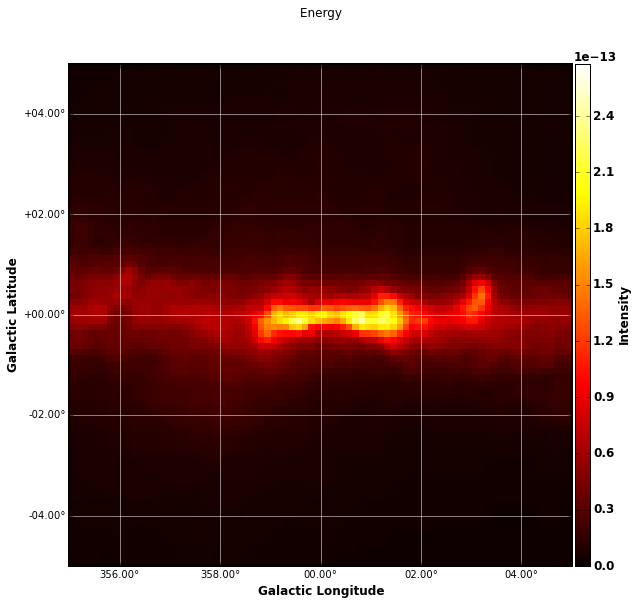

In [29]:
#Trouble with yt and Spectral-Cube that both want a spectral type/unit for the pixels
#Try aplpy instead
cbarTitle = 'Intensity' #individual slices are photons/s/cm^2/sr/MeV, if I sum over energies it's photons/s/cm^2/sr/MeV, mult by 4pi to get rid of the sr? or do I need to multpy by the fraction of 4pi of the sky im looking at??? 
figTitle = 'Energy ' #can I get the energy value?
f = aplpy.FITSFigure(fitsFile,slices=[29])
f.show_colorscale(vmin =0.0, pmax =100., cmap = 'hot', smooth = None) #do I need to playt with the pmin/max? values?
f.tick_labels.set_xformat('ddd.dd')
f.tick_labels.set_yformat('ddd.dd')
f.frame.set_color('black')
f.frame.set_linewidth(2)
f.add_colorbar()
f.axis_labels.set_font(size='large',weight='bold')
f.tick_labels.set_font(weight = 'bold')
f.add_label(0.5, 1.1, text = figTitle, relative = True, weight = 'medium', size='large')
f.colorbar.set_axis_label_text(cbarTitle)  
f.colorbar.set_font(size='large',weight = 'bold')
f.colorbar.set_axis_label_font(size='large',weight='bold')
#f.colorbar.set_ticks(ticks = plt.MaxNLocator(integer = True))

# for r in regFiles:
#     f.show_regions(r)
# for r in regFiles:
#     f.show_regions(r)
# for r in regFiles:
#     f.show_regions(r)
# if zoom:
l,b,zoom = 0,0,5
#center = reg.strip('Region_l').replace('b','').split('_') #b is always 0, but get it anyway in case I do runs with different b
#center = SkyCoord(l= float(center[0]), b = float(center[1]), frame = 'galactic', unit=(u.degree, u.degree))
f.recenter(l, b, zoom)
f.show_grid()
#sv = reg+maps.replace(' ','')+'_2FHLaddSrcsOverlay_zoom.png'
#     f.save(sv)
# else:
#     sv = reg+maps.replace(' ','')+'_2FHLaddSrcsOverlay.png'
#     f.save(sv)
#plt.savefig(sv,dpi = 100)
# f.close()
# del f


## Use coCube.py to integrate the diffuse > 50GeV

In [2]:
# first just try for one, then do for all 2FHL regions using the code for making maps
diffDir = '/Users/jmcohen/Desktop/2FHLgalDiffTest'
if not os.path.exists(diffDir):
    os.mkdir(diffDir)
os.chdir(diffDir)

In [28]:
#set up for the slices
#try for gamma Cygni
b = -0.979234969054
l = 206.089402215
s = 1.9098593166666666 #I think this will make a 14x14 box
coVmin = 5.e4 # 50 GeV
coVmax = 5.e5 #500 GeV
#don't need these yet
# fitsMap    = 
#contsz     = 5,
# regFile    = None,
# contFits   = None,
# coords     = 'gal',
# fTitle     = '',
# contLevels = 9,
# smooth     = 1,
lmin, lmax, bmin, bmax = cocube.getMapSize(l,b,s)
co = cocube.COline(COfile = '/Users/jmcohen/Desktop/template_4years_P8_V2_scaled.fits')
co.lvbSum(axis = 'all', pmin = [lmin,bmin,coVmin], pmax = [lmax,bmax,coVmax]) #for diffuse, group all lmin/lmax together?

axis  0 (205.13447255666668, 207.04433187333333) 205.134472557 207.044331873 data shape (30, 1441, 2880)
	nmin / nmax: 2880 2880
axis  1 (-1.9341646273873332, -0.024305310720666662) -1.93416462739 -0.0243053107207 data shape (30, 1441, 2880)
	nmin / nmax: 705.0 720.0
axis  2 (50000.0, 500000.0) 50000.0 500000.0 data shape (30, 1441, 2880)
	nmin / nmax: 22.0 29.0
nmin: {1: 2880, 2: 705.0, 3: 22.0} nmax: {1: 2880, 2: 720.0, 3: 29.0}
indiv 22.0 29.0 705.0 720.0 2880 2880
2FHLgalDiffTest_template_4years_P8_V2_scaled_sliced.fits already exists, delete and create it anew 
Save 3-D sliced Cube
2FHLgalDiffTest_template_4years_P8_V2_scaled_vb.fits already exists, delete and create it anew 
2FHLgalDiffTest_template_4years_P8_V2_scaled_lv.fits already exists, delete and create it anew 
2FHLgalDiffTest_template_4years_P8_V2_scaled_lb.fits already exists, delete and create it anew 


In [35]:
#doesn't seem to be working for gal diff
#It looks like it's only getting the last E slice
#oooo, I think it's because CDELT3 is log10 steps
#maybe this doesn't explain why it's just getting the last energy slice though (30)?
#I think I need to add something to coCube to handle log10 steps
#f(x) = 10^(log(Span)/n*x) + fStart
 = 10**(CDELT3/(bin*CRPIX3)) + CRVAL3
    10**((bin*CRPIX3)/CDELT3) + CRVAL3
print lmin, lmax, bmin, bmax

73.0 87.0 -7.0 7.0


# 9. Estimate Galactic diffuse intensity, flux from P8 diffuse file

See http://fermi.gsfc.nasa.gov/ssc/data/access/lat/Model_details/FSSC_model_diffus_reprocessed_v12.pdf

"The MapCube comprises 30 logarithmically-spaced energies between 50 MeV and 500 GeV (really 58.4731330871582 MeV to 513056.15625 MeV)
It gives the Galactic differential intensity in ${\rm photons~sr^{-1}~
s^{−1}~cm^{−2}~MeV^{−1}}$"

So to get photon flux is it just a matter of integrating the cube over E (summing the energy slices) and multiplying by 4$\pi$ (to get rid of the solid anlge)?, then multiplying by ${\rm E^2}$ for energy flux?

If I fit the diffuse with just a power law, then I just scale the intensity in the fits file with the Norm and energy index right?

Do the following calculate this (likely in the entire RoI?)
* Science Tools (pylike)
* Pointlike
* Gardian
 * Probably don't want to learn gardian just for this?

In [22]:
#quick test wrapping angle
from astropy.coordinates import Angle
l=[0,90, 180, 181, 250,360, -170, -1, -200, 0]
l = Angle(l, u.degree)
#l.wrap_at(360 * u.degree, inplace =True)
l.wrap_at('180d', inplace =True)

print l.degree
#Idk if this does what I want,
# I have coords from -179-180, if I put in 181, I get nothing back out

[   0.   90. -180. -179. -110.    0. -170.   -1.  160.    0.]


### For now, don't worry about integrating the cube (I will need to though I think, unless I can figure out how to do this with gtlike/pointlike).   

Instead, just use a single slice of the diffuse for overlaying with 2FHL TS maps

I think I should just use the TS maps for each source, overlay the addSrcs TS >25 regions, and then overlay contours of gal diff. 

Can aplpy just take a slice of cube to make contours or do I have to make a slice on my own first?

Do this in 2FHL Galactic Plane ipynb since all the input is there already

## More playing with diffuse to estimate bkg 8/19/15
### IS there a better tool for reading the diffuse file in and calculating the bkg

In [10]:
#read in the diffuse file to pyfits
fitsFile_full = '/Users/jmcohen/Desktop/cur/template_4years_P8_V2_scaled.fits'
#fitsFile = '/Users/jmcohen/Desktop/cur/2FHLgalDiffTest/template_4years_P8_V2_scaled_velo.fits' #maybe this is the same file but I changed the name of the axis to VELO so I could read it into yt
diffD = pyfits.getdata(fitsFile_full)
diffH = pyfits.getheader(fitsFile_full)
#units of each pixel in each slice is ph/MeV/cm^2/s/ ?

In [16]:
diffD.sum(axis = 0).sum()


3.9588947

In [14]:
diffH

SIMPLE  =                    T / Written by IDL:  Thu May 22 10:58:05 2014      
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                 2880 / length of data axis 1                          
NAXIS2  =                 1441 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                0.125 / Step size in longitude                         
CRPIX1  =               1440.5 / Pixel that has value CRVAL1                    
CTYPE1  = 'GLON-CAR'        

###I was initially trying to do to much and actually calculate